In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cc = [0] * 182
ws = [0] * 182
r = [0] * 182
a = [0] * 182
a_agg = [list() for x in range(182)]

def running_avg(list1, list2, i):
    return [(x * i + y) / (i + 1) for x,y in zip(list1, list2)]

def agg(l):
    for i in range(len(l)):
        a_agg[i].append(l[i])

In [36]:
# Read in data from files
for i in range(50):
    with open('PPO_Returns/predict_' + str(i) + '.json') as f_in:
        data = json.load(f_in)

        # Aggregate
#         obs = data['obs']
#         cc = running_avg(cc, obs_cc, i)
        rewards = data['rewards']
        r = running_avg(r, rewards, i)
        action = data['action']
#         a = running_avg(a, action, i)
#         agg(action)

r_stddev = [np.std(l) for l in r]

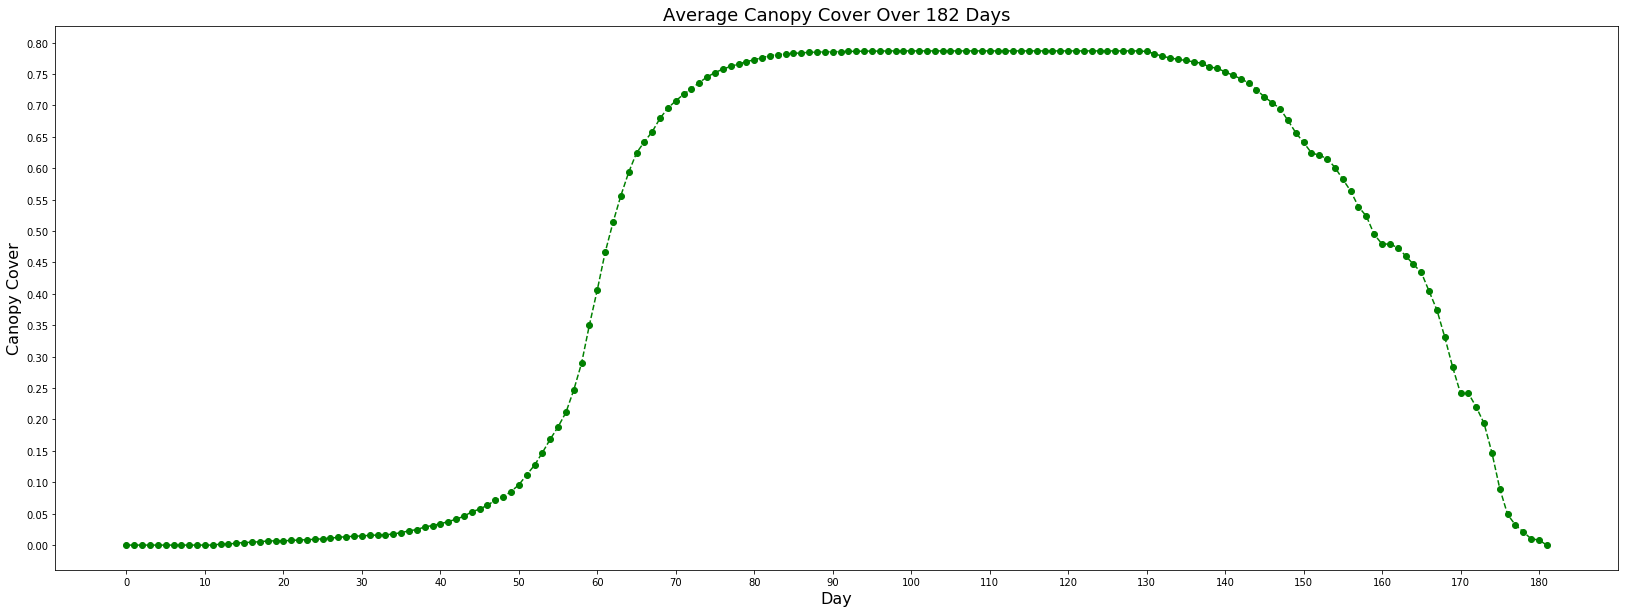

In [178]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.title('Average Canopy Cover Over 40 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Canopy Cover', fontsize=16)

plt.plot([i for i in range(40)], cc, linestyle='--', marker='o', color='g')
plt.savefig('avg_cc.png')
plt.show()

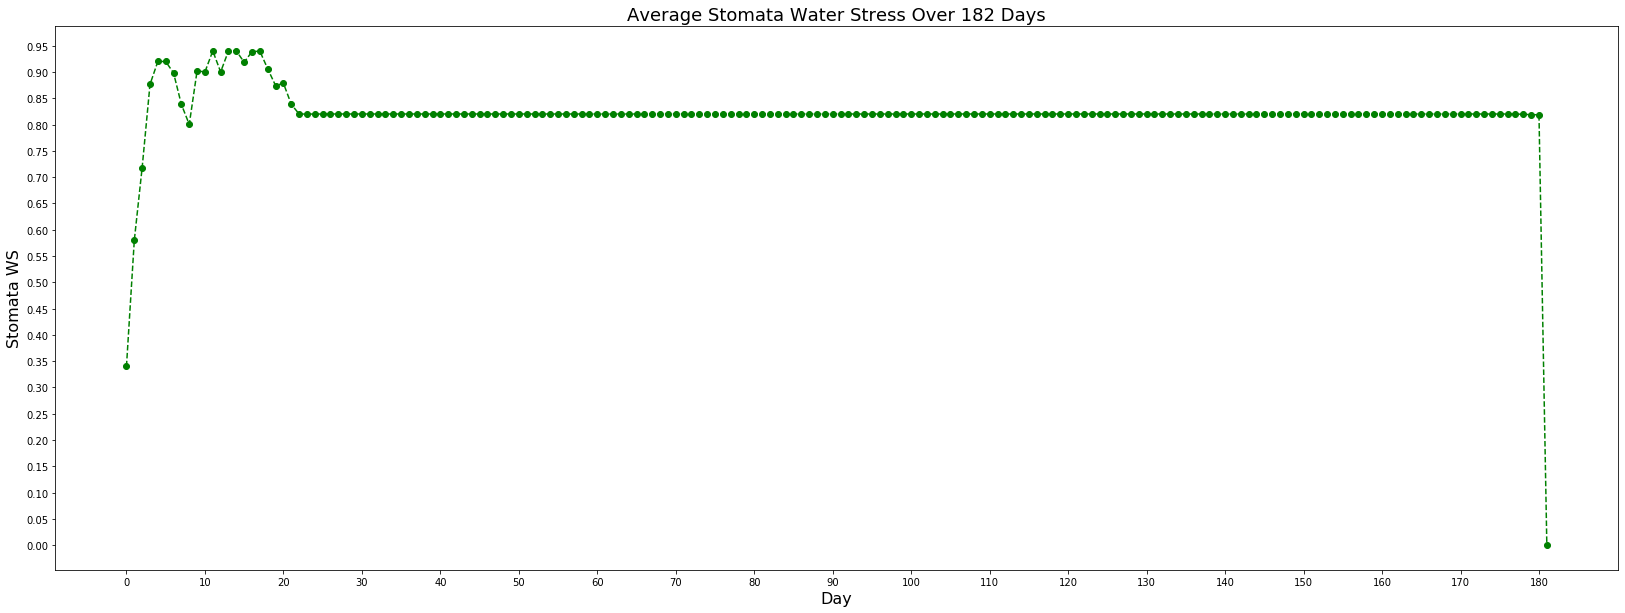

In [179]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.title('Average Stomata Water Stress Over 182 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Stomata WS', fontsize=16)

plt.plot([i for i in range(182)], ws, linestyle='--', marker='o', color='g')
plt.savefig('avg_ws.png')
plt.show()

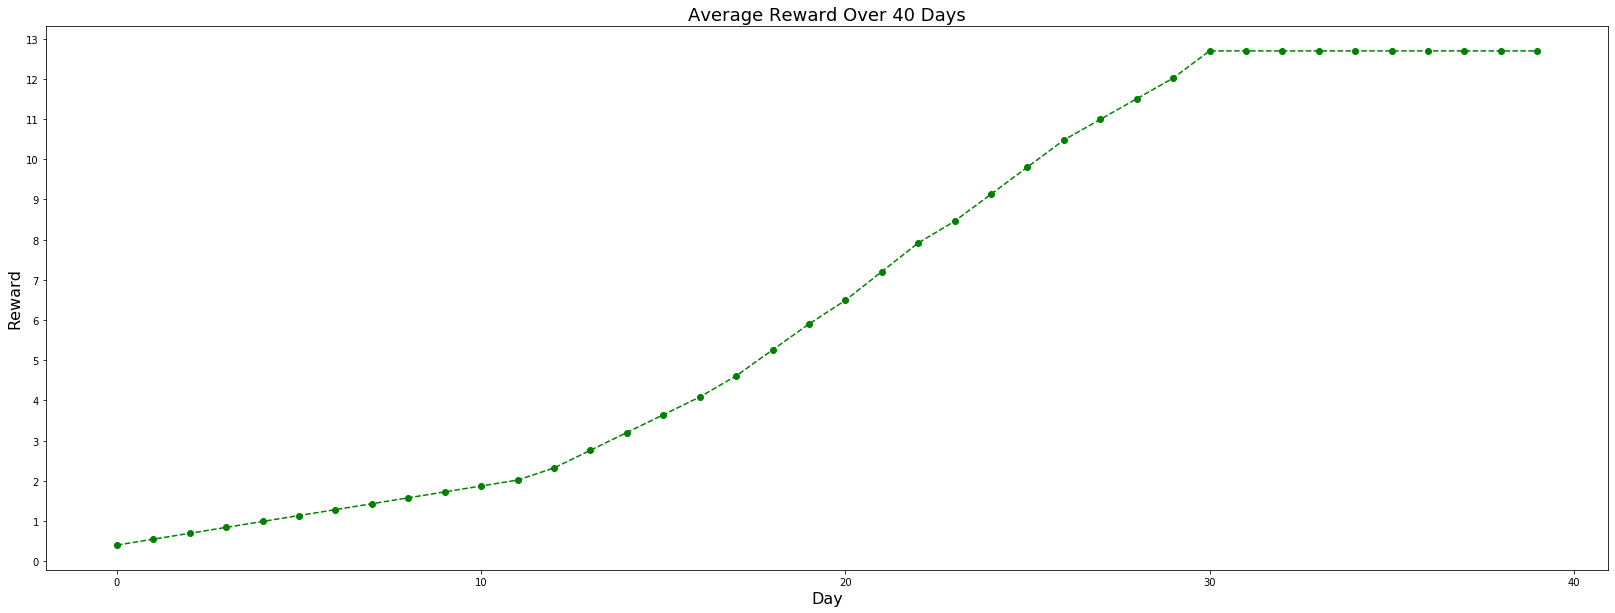

In [7]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0.0, 20, 1))
plt.title('Average Reward Over 40 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Reward', fontsize=16)

plt.plot([i for i in range(40)], r, linestyle='--', marker='o', color='g')
# plt.savefig('avg_r.png')
plt.show()

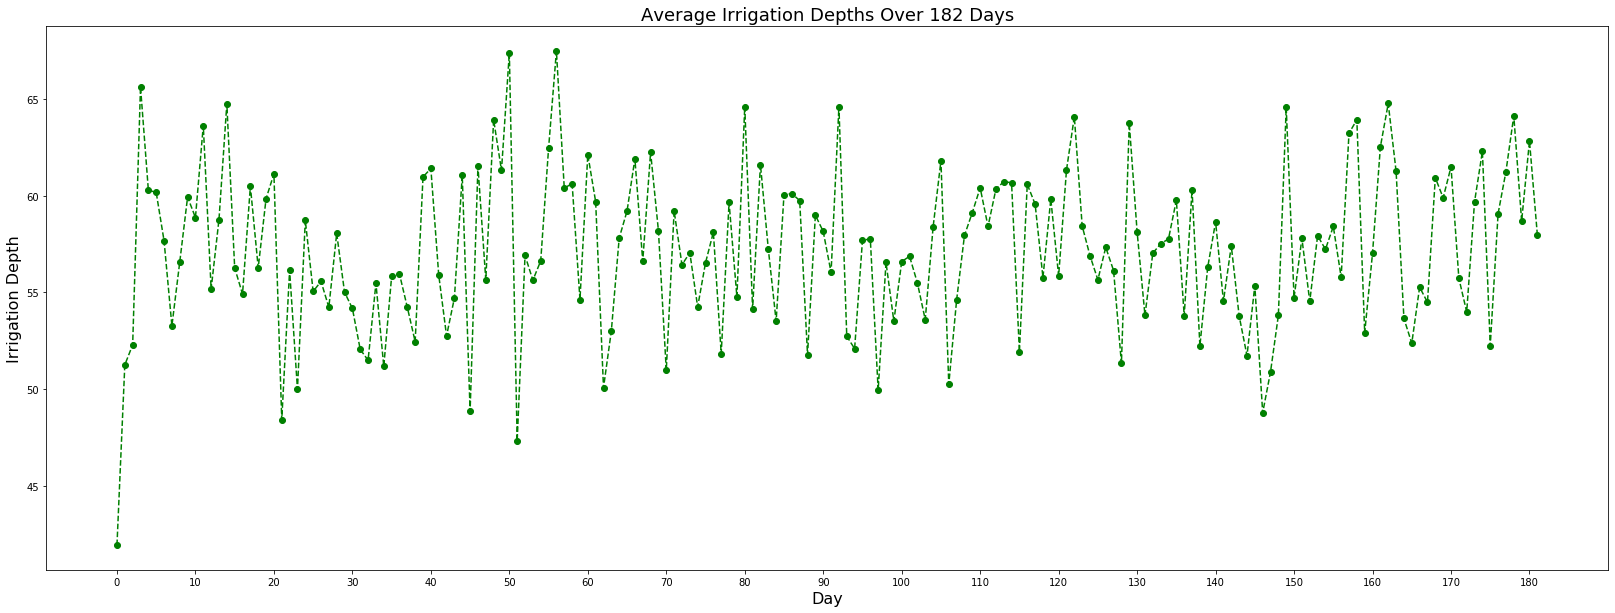

In [180]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0, 101, 5))
plt.title('Average Irrigation Depths Over 182 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Irrigation Depth', fontsize=16)

plt.plot([i for i in range(182)], a, linestyle='--', marker='o', color='g')
plt.savefig('avg_id.png')
plt.show()

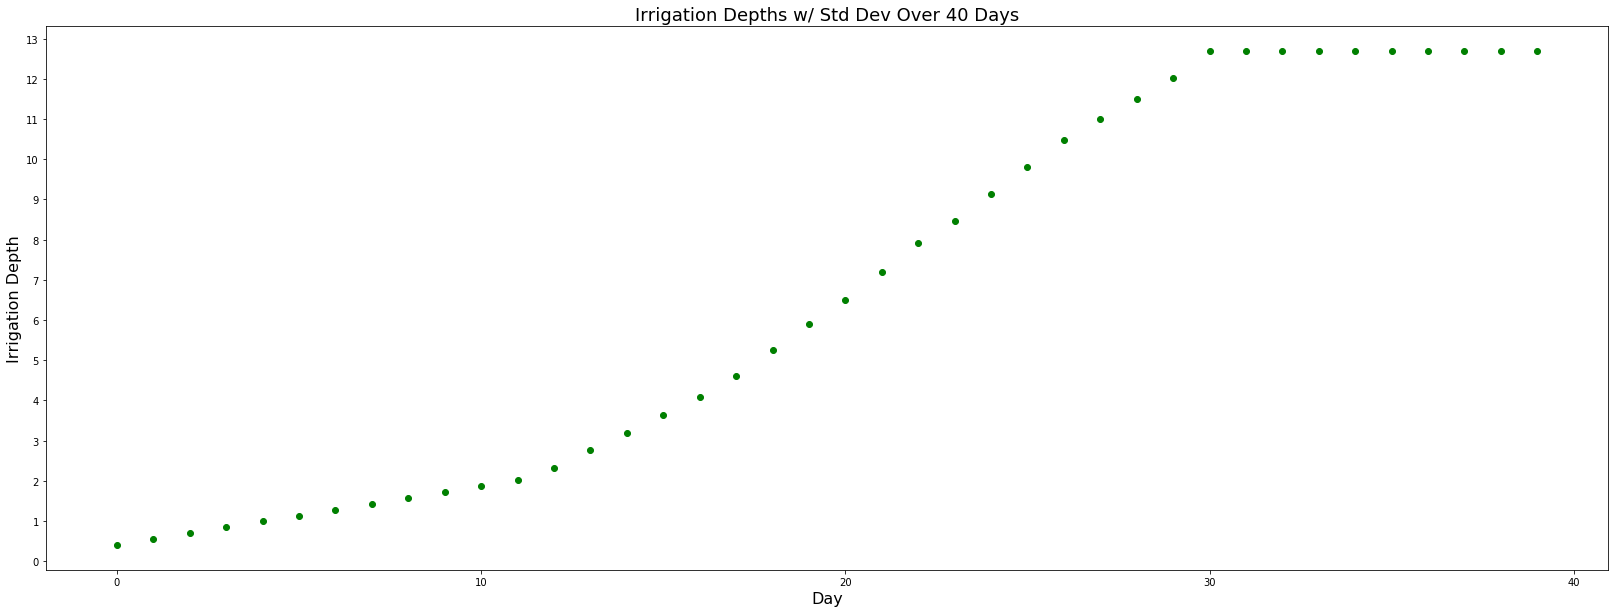

In [8]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0, 20, 1))
plt.title('Irrigation Depths w/ Std Dev Over 40 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Irrigation Depth', fontsize=16)

plt.errorbar([i for i in range(40)], r, r_stddev, linestyle='None', marker='o', color='g')
# plt.savefig('std_id.png')
plt.show()

In [69]:
# Read in data from files
for i in range(50):
    with open('PPO_Returns/predict_' + str(i) + '.json') as f_in:
        data = json.load(f_in)
        obs = data['obs']
final_obs = obs[38]
dimensions = len(final_obs)
garden = np.array([[0.0 for i in range(dimensions)] for j in range(dimensions)])
for i in range(dimensions):
    s = np.array([0.0 for i in range(dimensions)])
    for j in range(2):
        s = np.add(s, np.array(final_obs[i]).T[j])
    garden[i] = s

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 6.625    ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.     

In [82]:
def plot_water_map(garden, m, n, plants):
    fig = plt.figure(figsize=(10, 10))
    heatmap = np.sum(garden, axis=0)
    heatmap = heatmap.reshape((m, n))
    plt.imshow(heatmap, cmap='Blues', interpolation='nearest')
    for plant in plants:
        plt.plot(plant[0], plant[1], marker='X', markersize=20, color="lawngreen")
    plt.show()

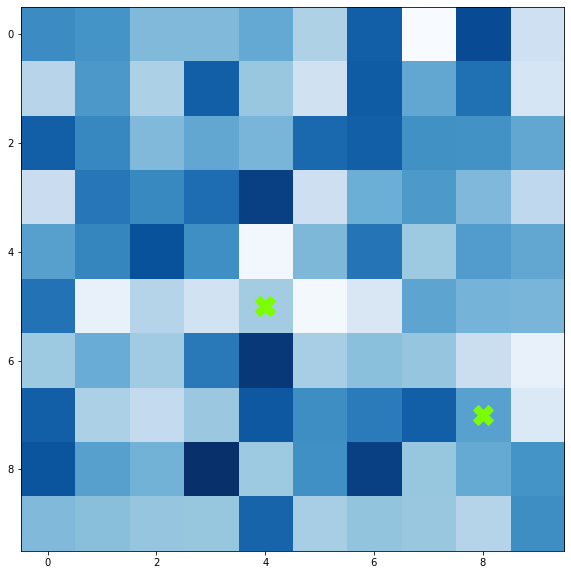

In [83]:
plot_water_map(action,10, 10, [(4, 5), (8, 7)])

6.625
6.0703125


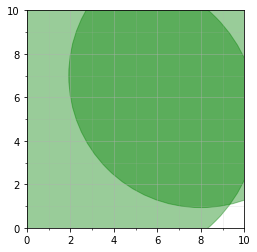

In [86]:
NUM_X_STEPS = 10
NUM_Y_STEPS = 10
STEP = 1
fig, ax = plt.subplots()
plt.xlim((0, NUM_X_STEPS * STEP))
plt.ylim((0, NUM_Y_STEPS * STEP))
ax.set_aspect('equal')

major_ticks = np.arange(0, NUM_X_STEPS * STEP + 1, NUM_X_STEPS // 5)
minor_ticks = np.arange(0, NUM_X_STEPS * STEP + 1, STEP)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

rows = garden.shape[0]
cols = garden.shape[1]
for x in range(0, rows):
    for y in range(0, cols):
        if garden[x,y] != 0:
            print(garden[x,y])
            circle = plt.Circle((x,y) * STEP, garden[x,y], color="green", alpha=0.4)
            ax.add_artist(circle)

plt.show()